In [3]:
import numpy as np
import matplotlib.pyplot as plt

notes
initial temp = room
x, y - spatial dimension
t - time
T - Kalwins as unit (as i want)
K - therma conductivity
cw - specific heat
Heater contact = 100 C

condition type 2
derivate in insolted part is 0

The whole plate should have the same temp. Sould higher than initial. 

Results
Verify simulation with theory for every metal. Compare them.

Size of plat 10x10
heater 2x2
h = 0.005 m
boundary condition 1
T1 = 100
T2 = 10
boundry condition 2
P = 100
th = 10
B = edge is isolated - boundary particle value is the same as pre-boundary

Don't consider boundar particles in equation, they are formulated in boundary condition

Only first boundary condition
Steady state of three matels, compare them
Numerical stability
Demonstrate temparature distribution

In [39]:
# intput data
A = 0.1
B = 0.02
h = 0.005
#N =  number of paritcles
nrows = 100
ncols = 100
dx = A/ncols
dy = A/nrows
dt = 1e-3
NX = a/dx +1
NT = dt_sin/dt
# aluminia
K = 237 
cw = 900
p = 2700
# 1 boundary condition
T1 = 100
T2 = 10

In [41]:
# first boundary condition
T = np.ones((nrows, ncols)) * T2
up_shift = int(0.5*ncols - 0.5*B/dx)
down_shift = int(0.5*ncols + 0.5*B/dx)
T[up_shift:down_shift,up_shift:down_shift] = 100

In [44]:
for i,
i, j = 2,2
dT2_num = T[i+1, j] - 2 * T[i, j] + T[i-1, j]
const = (K * dt)/(cw * p)
T[i,j] = T[i,j] + const / (dx**2) * dT2_num + const / (dy**2) *dT2_num

ValueError: x and y must have same first dimension, but have shapes (10000,) and (100, 100)

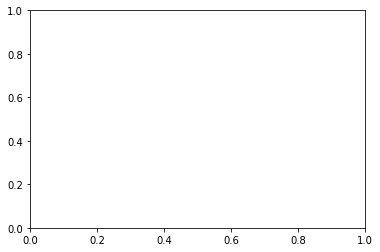

In [47]:
plt.plot(, T)